<a href="https://colab.research.google.com/github/brigitayantie/Stock/blob/master/Stock_Simple_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This is a python program for finance. 
#             This program will show you how to compute portfolio simple returns, 
#             get daily returns and volatility etc.

#Resources:
# Efficient Frontier => https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f
# How To Be A Successful Investor => https://towardsdatascience.com/how-to-be-a-successful-investor-simple-portfolio-analysis-with-python-7b66fc90fa68
# Financial Python => https://www.quantconnect.com/tutorials/introduction-to-financial-python/rate-of-return,-mean-and-variance
# How To Calculate stock returns in Python => https://www.codingfinance.com/post/2018-04-03-calc-returns-py/
# Log Returns VS Simple Returns => https://fintechprofessor.com/tag/log-returns-vs-simple-returns/
# A Tale Of Two Returns => https://www.portfolioprobe.com/2010/10/04/a-tale-of-two-returns/ 
# Stack Overflow => https://stackoverflow.com/questions/20000726/calculate-daily-returns-with-pandas-dataframe
# Get business days: https://stackoverflow.com/questions/2224742/most-recent-previous-business-day-in-python
# Log Returns for beginners => https://www.coursera.org/lecture/risk-governance-engage-the-board/video-3-2c-log-returns-for-beginners-Jsnqa 
# Why we use log returns in finance => https://www.youtube.com/watch?v=PtoUlt3V0CI 
# Market Lessons: Why we use log returns => http://mktlssns.blogspot.com/2010/04/why-we-use-log-returns.html 
# Magic of log returns => https://investmentcache.com/magic-of-log-returns-concept-part-1/
# An easy mistake with returns => https://www.r-bloggers.com/an-easy-mistake-with-returns/
# Sharp Ratio => https://www.investopedia.com/terms/s/sharperatio.asp
# Simple Calculations to Determine Return on Investments => https://www.thebalance.com/determine-return-on-investment-3140687 
# How Covariance used portfolio theory => https://www.investopedia.com/ask/answers/041315/how-covariance-used-portfolio-theory.asp 

In [ ]:
# Import the libraries
#from datetime import datetime
import datetime

import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock symbols in your portfolio, 
# I am using FAANG for the portfolio stock
# FAANG is an acronym for the market's five most popular and best-performing tech stocks 
#   (Facebook, Amazon, Apple, Netflix, & Google)
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [ ]:
#Get the stock starting date
stockStartDate = '2018-01-01'

In [ ]:
# Get todays date and format it in the form YYYY-MM-DD
from datetime import date
today=date.today().strftime('%Y-%m-%d')

print(today)

2020-09-17


In [ ]:
# Get the number of assests in the portfolio
numAssets = len(stockSymbols)
# Print the number of assests in your portfolio
print('You have '+ str(numAssets)+ ' assets in your portfolio')

You have 5 assets in your portfolio


In [ ]:
# Create a function to get the stock price(s) of the portfolio
def getMyPortfolio(stocks= stockSymbols, start = stockStartDate, end = today, col='Adj Close'):
    #data = web.get_data_yahoo(stocks, start = start, end = end)[col]
    data =  web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
    return data

In [ ]:
# Get the stock portfolio Adj. Close price and store it into my_stocks variable
my_stocks = getMyPortfolio(stockSymbols)
# Show my stocks
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2018-01-02,181.419998,1189.010010,41.513580,201.070007,1065.000000
2018-01-03,184.669998,1204.199951,41.506344,205.050003,1082.479980
2018-01-04,184.330002,1209.589966,41.699139,205.630005,1086.400024
2018-01-05,186.850006,1229.140015,42.173893,209.990005,1102.229980
2018-01-08,188.279999,1246.869995,42.017254,212.050003,1106.939941
...,...,...,...,...,...
2020-09-10,268.089996,3175.110107,113.489998,480.670013,1532.020020
2020-09-11,266.609985,3116.219971,112.000000,482.029999,1520.719971
2020-09-14,266.149994,3102.969971,115.360001,476.260010,1519.280029


In [ ]:
# Create a function to visualize the portfolio
def showGraph(stocks= stockSymbols,start=stockStartDate, end=today, col='Adj Close'):
  
  # Create the title 'Portfolio (High,	Low,	Open,	Close,	Volume,	Adj Close) Price History
  title = 'Portfolio ' + col + ' Price History'
  #Get the stocks
  my_stocks = getMyPortfolio(stocks= stocks, start=start, end=end, col = col)
  
  # Visualize the price history
  plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5in 
  # Loop through each stock and plot the Adj Close for each day
  for c in my_stocks.columns.values:
    plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
  plt.title(title)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel(col +' Price USD ($)',fontsize=18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()


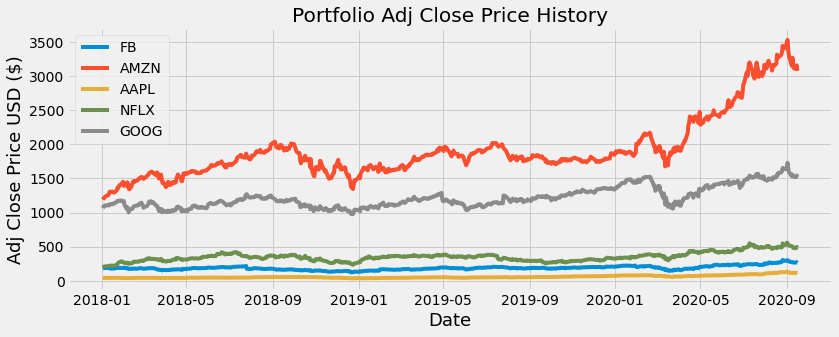

In [ ]:
# Show the adjusted close price of FAANG and see how the stocks compare with each other
showGraph(stockSymbols)

In [ ]:
# Calculate Simple Returns
daily_simple_returns = my_stocks.pct_change(1) # 1 for ONE DAY lookback for each individual return  NOTE:simple return = new/old - 1
# monthly_simple_returns = my_stocks.pct_change(21) # 21 for ONE MONTH lookback for each individual return
# annual_simple_returns = my_stocks.pct_change(253) # 253 for ONE YEAR lookback for each individual return
# Show the daily simple returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.017914,0.012775,-0.000174,0.019794,0.016413
2018-01-04,-0.001841,0.004476,0.004645,0.002829,0.003621
2018-01-05,0.013671,0.016163,0.011385,0.021203,0.014571
2018-01-08,0.007653,0.014425,-0.003714,0.009810,0.004273
...,...,...,...,...,...
2020-09-10,-0.020568,-0.028605,-0.032646,-0.039025,-0.016018
2020-09-11,-0.005521,-0.018547,-0.013129,0.002829,-0.007376
2020-09-14,-0.001725,-0.004252,0.030000,-0.011970,-0.000947


In [ ]:
# Show the stock correlation
# Covariance and correlation are two mathematical concepts which are commonly used in statistics. 
# When comparing data samples from different populations, 
# covariance is used to determine how much two random variables vary together 
# (the directional relationship between two asset prices),
# whereas correlation is used to determine when a change in one variable can result in a change in another.

# A correlation value of 1 means two stocks have a perfect positive correlation. If one stock moves up while the other goes down,
# they would have a perfect negative correlation, noted by a value of -1

# The correlation will always have a measurement value between -1 and 1, and it adds a strength value on how the stocks move together. ... In short, covariance tells you that two variables change 
# the same way while correlation reveals how a change in one variable affects a change in the other.
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.618403,0.615967,0.512886,0.701332
AMZN,0.618403,1.000000,0.643365,0.675514,0.697025
AAPL,0.615967,0.643365,1.000000,0.505757,0.710674
NFLX,0.512886,0.675514,0.505757,1.000000,0.580762
GOOG,0.701332,0.697025,0.710674,0.580762,1.000000


In [ ]:
# Show the covariance matrix for simple returns
# Covariance is an important measurement used in modern portfolio theory.
# Modern Portfolio Theory attempts to determine an efficient frontier 
# (The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return.) for a mix of assets in a portfolio. 
# The efficient frontier seeks to optimize the maximum return versus the degree of risk for the overall combined assets 
# in the portfolio.

# Covariance can tell how the stocks move together
# The diagonal entries of the covariance matrix are the variances and the other entries are the covariances
# The covariance of two stocks tells you how likely they are to increase or decrease simultaneously.

# Variance (σ^2) in statistics is a measurement of the spread between numbers in a data set. 
# It measures how far each number in the set is from the mean and therefore from every other number in the set. 
# In finance variance is a measure of dispersion and, most of the time variance is a synonym for risk. 
# The higher the variance of an asset price, the higher risk the asset bears along with a higher return and a higher volatility
# The lower the variance of an asset price, the lower risk the asset bears along with a lower return and a lower volatility

# Variance measures the stocks volatility if you take the square root, e.g. sqrt(variance) = σ = volatility = standard deviation
# NOTE: Volatility is the degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns.
# Show the covariance matrix for simple returns
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000577,0.000309,0.000327,0.000334,0.000330
AMZN,0.000309,0.000434,0.000296,0.000381,0.000284
AAPL,0.000327,0.000296,0.000489,0.000303,0.000308
NFLX,0.000334,0.000381,0.000303,0.000734,0.000308
GOOG,0.000330,0.000284,0.000308,0.000308,0.000383


In [ ]:
# Show the variance
daily_simple_returns.var()

Symbols
FB      0.000577
AMZN    0.000434
AAPL    0.000489
NFLX    0.000734
GOOG    0.000383
dtype: float64

In [ ]:
# Print the standard deviation σ (or volatility or sqrt(variance)) for daily simple returns 
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.024016
AMZN    0.020825
AAPL    0.022115
NFLX    0.027085
GOOG    0.019569
dtype: float64

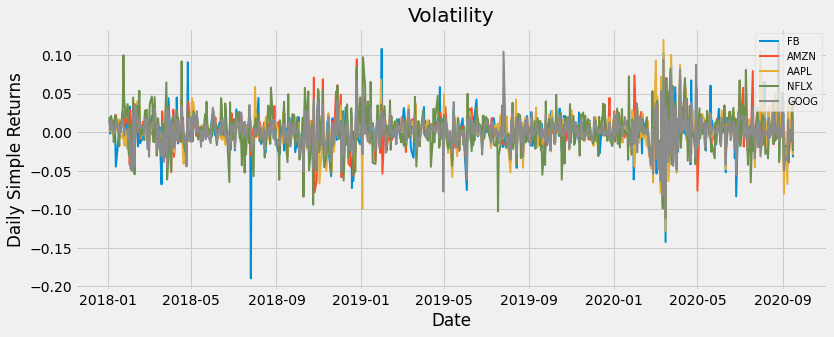

In [ ]:
# Visualize the stocks daily simple returns / volatility and see how the stocks compare to each other
plt.figure(figsize=(12,4.5)) #Set the figure size (width, height)

# Loop through each stock and plot the simple returns for each day
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper right', fontsize=10) 

plt.title('Volatility')
plt.ylabel('Daily Simple Returns') #Label the Y-axis simple returns 
plt.xlabel('Date')
plt.show()

In [ ]:
# Show the mean / average of the daily simple return
dailyMeanSimpleReturns = daily_simple_returns.mean() 

# Print the daily mean simple return
print("The daily mean simple return: ")
print(dailyMeanSimpleReturns)

The daily mean simple return: 
Symbols
FB      0.000841
AMZN    0.001614
AAPL    0.001705
NFLX    0.001656
GOOG    0.000715
dtype: float64


In [ ]:
# Calculate the expected portfolio daily performance with random weights 
# [0.4, 0.1, 0.3,0.1,0.1] => 40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG
randomWeights = np.array([0.4, 0.1, 0.3,0.1,0.1])
portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns*randomWeights) #NOTE: Be sure to account for rounding of decimal

# Print the daily expected portfolio return
print("The daily expected portfolio return: " +str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0012463150057481043


In [ ]:
# Get the yearly simple return, we multiply by 253 instead of 365 because their are approximately 253 trading days in a year
# The NYSE and NASDAQ average about 252 or 253 trading days a year. In 2018 there were 252 trading days in 2020 there will be 253.
# This is from 365.25 (days on average per year) * 5/7 (proportion work days per week) - 6 (weekday holidays) - 3*5/7 (fixed date holidays) = 252.75 ≈ 253. 
# Print the expected annual portfolio simple return
print("Expected annualised portfolio simple return : "+ str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return : 0.3153176964542704


In [ ]:
# Calculate the growth of our investment or in other words,
# calculate the total returns from our investment,to do this we need to calculate the cumulative returns 
# from that investment. 
# The Daily cumulative simple return for n-periods:
#    The simple return from period_1 + 1 times the simple return from period_2 + 1 times ... the simple return from period_n
#    (1+simple_return_1) * (1+simple_return_2) * ... *(1+simple_return_n)
#    Example: (daily_simple_returns["GOOG"][1] + 1) * (daily_simple_returns["GOOG"][2] + 1) = 1.020353
#                    0.000581 * 0.019760 =  1.020353
dailyCumulSimplReturn = (daily_simple_returns+1).cumprod()
# Show the cumulative simple return
dailyCumulSimplReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.017914,1.012775,0.999826,1.019794,1.016413
2018-01-04,1.016040,1.017308,1.004470,1.022679,1.020094
2018-01-05,1.029931,1.033751,1.015906,1.044363,1.034958
2018-01-08,1.037813,1.048662,1.012133,1.054608,1.039380
...,...,...,...,...,...
2020-09-10,1.477731,2.670381,2.733804,2.390560,1.438516
2020-09-11,1.469573,2.620853,2.697912,2.397324,1.427906
2020-09-14,1.467038,2.609709,2.778850,2.368628,1.426554


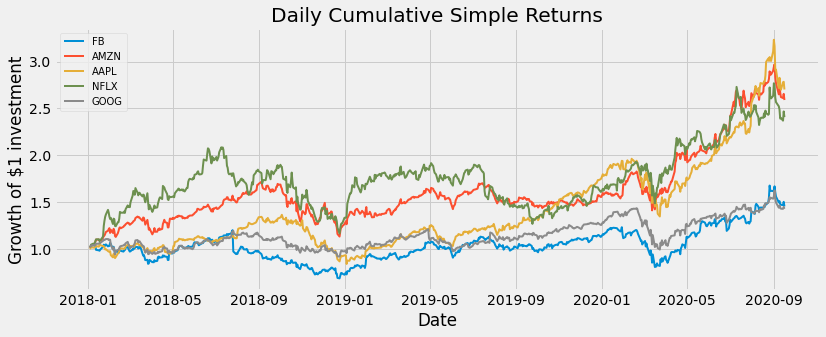

In [ ]:
# Visualize the daily cumulative simple returns
fig = plt.figure(figsize=(12.2,4.5))
for c in dailyCumulSimplReturn.columns.values:
  plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], lw=2, label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper left', fontsize=10) 
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Daily Cumulative Simple Returns")
plt.show()